In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import QuantileTransformer

%matplotlib inline

In [ ]:
# https://stackoverflow.com/questions/41768629/normal-distribution-plot-by-name-from-pandas-dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html

In [2]:
dfMedicaidInState = pd.read_csv('MedicaidCoverageByState2017.csv')

In [3]:
dfMedicaidInState.sort_values('Medicaid', axis=0, ascending=True, inplace=True)

In [4]:
dfMedicaidInState.head()

,Location,Medicaid
43,UT,0.11
33,ND,0.11
45,VA,0.12
49,WY,0.13
26,NE,0.13


In [5]:
X = dfMedicaidInState['Location']
Y = dfMedicaidInState['Medicaid']

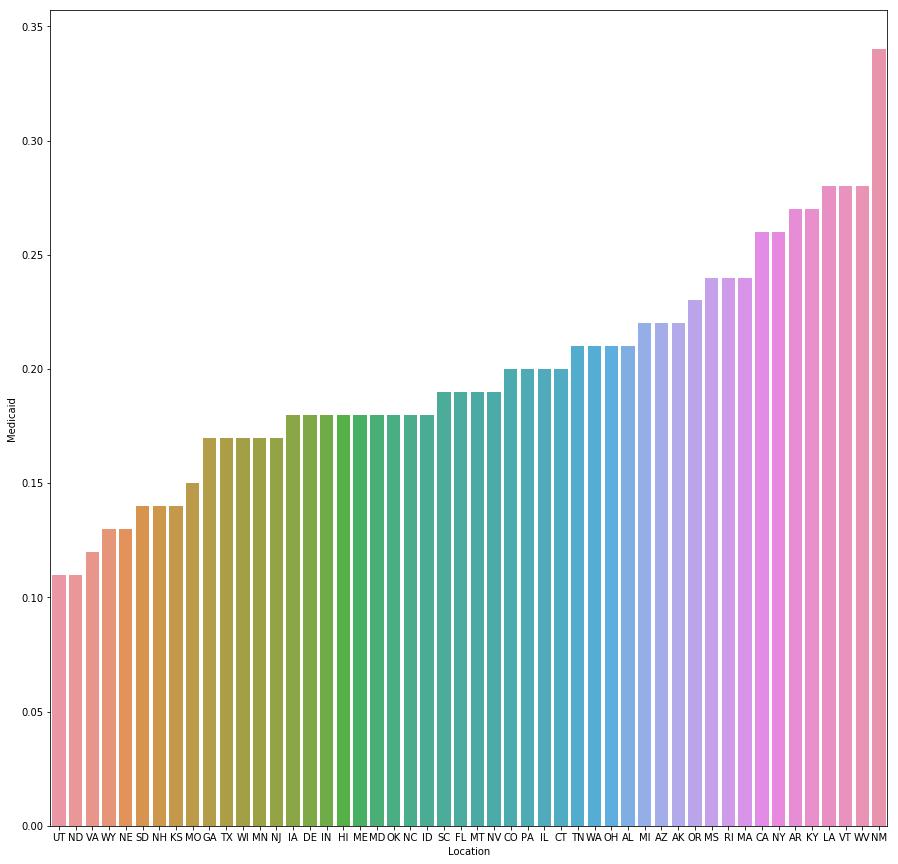

In [11]:
plt.figure(figsize=(15,15))
sns.barplot(x = X, y = Y)

In [12]:
dfDrsMedicaidInState = pd.read_csv('DoctorsMedicaidCoverageByState2017.csv')

In [14]:
dfDrsMedicaidInState.head()

,Location,Medicaid,PhysiciansPer100k
0,AL,0.21,328
1,AK,0.22,546
2,AZ,0.22,366
3,AR,0.27,334
4,CA,0.26,380


In [17]:
type(dfDrsMedicaidInState.iloc[0][2])

numpy.int64

In [18]:
dfDrsMedicaidInState2 = dfDrsMedicaidInState.set_index('Location')

In [20]:
dfDrsMedicaidInState2.head()

,Medicaid,PhysiciansPer100k
Location,,
AL,0.21,328
AK,0.22,546
AZ,0.22,366
AR,0.27,334
CA,0.26,380


In [22]:
dfDrsMedicaidInState3 = dfDrsMedicaidInState.pivot("Location","Medicaid","PhysiciansPer100k")

In [24]:
dfDrsMedicaidInState3.fillna(0)

Medicaid,0.11,0.12,0.13,0.14,0.15,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.26,0.27,0.28,0.34
Location,,,,,,,,,,,,,,,,,
AK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,546.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,328.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0
AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,366.0,0.0,0.0,0.0,0.0,0.0,0.0
CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380.0,0.0,0.0,0.0
CO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,395.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,487.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DE,0.0,0.0,0.0,0.0,0.0,0.0,553.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
dfDrsMedicaidInState3.head()

Medicaid,0.11,0.12,0.13,0.14,0.15,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.26,0.27,0.28,0.34
Location,,,,,,,,,,,,,,,,,
AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,546.0,NaN,NaN,NaN,NaN,NaN,NaN
AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334.0,NaN,NaN
AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,366.0,NaN,NaN,NaN,NaN,NaN,NaN
CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,NaN,NaN,NaN


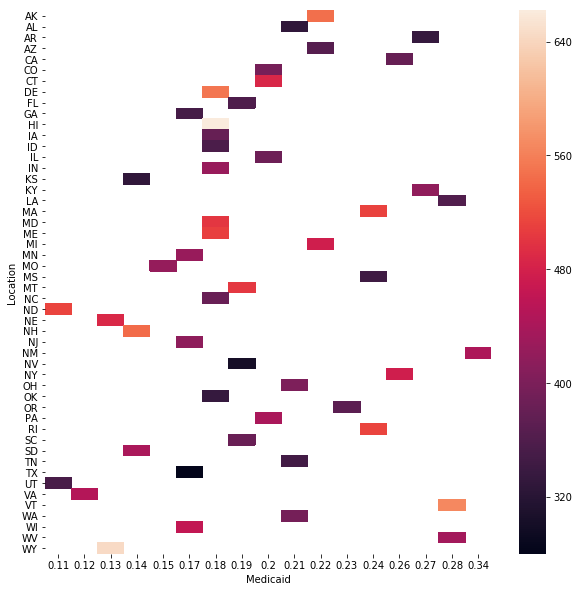

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(dfDrsMedicaidInState3)